# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nahdhiyah
- **Email:** dyahnahdya@gmail.com
- **ID Dicoding:** dyahnahdya

## Menentukan Pertanyaan Bisnis

Menetapkan pertanyaan bisnis merupakan langkah krusial dalam proses analisis data, karena hal ini membantu mengarahkan fokus analisis, memastikan relevansi dengan kebutuhan pemangku kepentingan, serta memperjelas tujuan akhir yang ingin dicapai melalui interpretasi data. Dengan adanya pertanyaan bisnis yang tepat, proses analisis menjadi lebih terstruktur dan hasilnya dapat digunakan secara efektif untuk mendukung pengambilan keputusan strategis. Berikut adalah pertanyaan bisnis dari project ini:

1.   Bagaimana tren kualitas udara dari tahun ke tahun di berbagai lokasi di Beijing?
  *   Tujuan: Mengidentifikasi apakah upaya pengurangan polusi udara selama periode 2013–2017 berhasil.

2.   Stasiun mana yang mencatat tingkat polusi tertinggi dan terendah secara konsisten?
  *   Tujuan: Menentukan area yang paling berisiko terhadap polusi dan membutuhkan intervensi.

3.   Apakah ada perbedaan kualitas udara antara musim (musim dingin vs musim panas)?
  *   Tujuan: Mengetahui pengaruh faktor musiman terhadap tingkat polusi, misalnya pembakaran batu bara di musim dingin.

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Melakukan proses pengumpulan, evaluasi, dan pembersihan data merupakan tahapan penting dalam analisis data untuk memastikan bahwa data yang digunakan memiliki kualitas yang baik. Data yang telah melalui proses ini akan lebih akurat, konsisten, dan bebas dari kesalahan atau duplikasi, sehingga dapat mendukung proses analisis secara lebih optimal dan menghasilkan insight yang dapat diandalkan untuk pengambilan keputusan.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Air-quality-dataset.zip to Air-quality-dataset.zip


In [4]:
!unzip Air-quality-dataset.zip

Archive:  Air-quality-dataset.zip
   creating: PRSA_Data_20130301-20170228/
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv  


### Gathering Data

Tahap awal dalam proses analisis dimulai dengan mengumpulkan dataset yang relevan, yaitu data yang akan digunakan untuk mengevaluasi kondisi dan kualitas udara di wilayah Beijing. Proses ini mencakup identifikasi sumber data yang valid, memastikan kelengkapan informasi yang dibutuhkan, serta mempersiapkan data tersebut sebagai dasar untuk melakukan analisis yang komprehensif terhadap tingkat polusi udara di berbagai lokasi dan periode waktu.

In [5]:
# Import data
Aotizhongxin = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
Guanyuan = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
Gucheng = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
Huairou = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
Nongzhanguan = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Shunyi = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
Tiantan = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
Wanliu = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
Wanshouxigong = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [6]:
# Menggabungkan semua data menjadi satu DataFrame
data = pd.concat([Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong], axis=0)

# Menampilkan 5 baris pertama
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Data dikumpulkan dari 12 stasiun pemantauan kualitas udara di Beijing, yang mencakup area berbeda seperti Aotizhongxin, Dongsi, hingga Wanshouxigong. Ini memberikan cakupan spasial yang luas terhadap kondisi udara di berbagai wilayah kota.
- Semua dataset mencakup periode Maret 2013 hingga Februari 2017, sehingga analisis tren jangka panjang selama hampir 4 tahun.
- Semua file CSV memiliki struktur kolom yang seragam, sehingga memungkinkan proses penggabungan (concatenation) tanpa perlu transformasi tambahan.
- Dengan menggabungkan data dari 12 stasiun, total baris data menjadi sangat besar, memungkinkan analisis statistik dan machine learning yang lebih representatif dan akurat.
- Penggunaan pd.read_csv() untuk masing-masing file dan pd.concat() untuk penggabungan menunjukkan bahwa data sudah dalam format tabular yang siap untuk dilanjutkan ke tahap preprocessing (pembersihan, penanganan missing value, dan lainnya).

### Assessing Data

Melakukan evaluasi terhadap kualitas data secara menyeluruh serta mengidentifikasi potensi kesalahan, inkonsistensi, atau nilai yang tidak valid guna memastikan bahwa data yang digunakan dalam analisis memiliki tingkat keandalan dan akurasi yang tinggi.

In [7]:
# Melihat Informasi Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [8]:
# Mengecek missing value
data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [9]:
# Melihat duplikasi data
print(f"Jumlah data duplikat: {data.duplicated().sum()}")

Jumlah data duplikat: 0


In [10]:
# Melihat deskriptif statistik data
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**

- Dataset ini terdiri dari dua tipe data utama, yaitu numerik dan kategorikal. Sebanyak 16 kolom memiliki tipe data numerik, dengan rincian 11 kolom bertipe float64 dan 5 kolom bertipe int64. Sementara itu, terdapat 2 kolom bertipe kategorikal atau teks, yaitu wd dan station. Informasi ini penting untuk menentukan strategi preprocessing yang sesuai, seperti normalisasi data numerik atau encoding untuk data kategorikal sebelum dilakukan analisis atau pemodelan lebih lanjut.
- Sebagian besar kolom dalam dataset mengandung missing values, yaitu PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM.  Kondisi ini menandakan pentingnya proses pemeriksaan kualitas data dan penanganan nilai hilang sebagai bagian dari tahapan preprocessing.
- Tidak ditemukan adanya data duplikat dalam dataset, yang menunjukkan bahwa setiap baris merupakan entri unik tanpa penggandaan catatan. Hal ini mengindikasikan bahwa dari sisi duplikasi, kualitas data sudah tergolong baik dan tidak memerlukan tindakan pembersihan lebih lanjut terkait penghapusan duplikat.
- Distribusi dan rentang nilai pada data menunjukkan adanya kemungkinan nilai ekstrem atau outlier. Misalnya, pada kolom CO, ditemukan nilai maksimum sebesar 10.000 dan minimum 100, yang cukup jauh dari nilai rata-rata 1.230,77, sehingga mencurigakan dan perlu ditelusuri lebih lanjut. Selain itu, PM2.5 dan PM10 memiliki nilai maksimum 999, yang bisa jadi bukan nilai aktual, melainkan kode untuk data yang tidak tersedia atau kesalahan pencatatan. Sementara itu, kolom RAIN memiliki nilai median dan kuartil atas (75th percentile) sama-sama 0, yang menunjukkan bahwa sebagian besar data mencatatkan tidak adanya hujan, sehingga distribusi data pada kolom ini cenderung berat sebelah.

### Cleaning Data

Hasil dari proses penilaian kualitas data (assessing data) menunjukkan adanya sejumlah missing value pada beberapa kolom, sehingga langkah selanjutnya yang perlu dilakukan adalah proses pembersihan data (data cleaning) untuk menangani nilai-nilai yang hilang tersebut guna memastikan data yang digunakan dalam analisis memiliki kualitas yang baik dan dapat diandalkan.

In [11]:
# Mengisi missing value pada data numeric
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())
data['PM10'] = data['PM10'].fillna(data['PM10'].median())
data['CO'] = data['CO'].fillna(data['CO'].median())
data['O3'] = data['O3'].fillna(data['O3'].median())
data['SO2'] = data['SO2'].fillna(data['SO2'].mean())
data['NO2'] = data['NO2'].fillna(data['NO2'].mean())
data['TEMP'] = data['TEMP'].fillna(data['TEMP'].mean())
data['PRES'] = data['PRES'].fillna(data['PRES'].mean())
data['DEWP'] = data['DEWP'].fillna(data['DEWP'].mean())
data['RAIN'] = data['RAIN'].fillna(data['RAIN'].median())
data['WSPM'] = data['WSPM'].fillna(data['WSPM'].mean())

In [12]:
# Mengatasi missing value pada data categorical

# Mengecek jumlah data yang sering muncul
data['wd'].value_counts().sort_values(ascending=False).head(1)

,count
wd,
NE,43335


In [13]:
# Mengisi missing value
data['wd'] = data['wd'].fillna(data['wd'].mode()[0])

In [14]:
# Melihat kembali jumlah missing value
data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Dalam proses data cleansing, nilai hilang pada kolom PM2.5, PM10, CO, O3, dan RAIN diisi menggunakan nilai median karena data tersebut cenderung memiliki outlier, sehingga median lebih stabil dibandingkan mean. Sementara itu, kolom SO2, NO2, TEMP, PRES, DEWP, dan WSPM diisi menggunakan nilai mean karena distribusi data dianggap relatif simetris dan tidak terlalu dipengaruhi oleh outlier. Untuk kolom wd yang berisi data kategorikal, nilai hilang diisi menggunakan modus (mode), yaitu nilai yang paling sering muncul dalam kolom tersebut.
- Dengan menggunakan .mode()[0] untuk mengisi nilai NaN di kolom wd, kita bisa mengetahui arah angin yang paling sering terjadi di data tersebut. Ini juga memberi insight tentang kondisi dominan dalam data cuaca atau kualitas udara.
- Pemilihan metode statistik seperti mean, median, dan mode untuk mengisi nilai hilang mencerminkan pemahaman terhadap karakteristik data yang dimiliki. Mean digunakan untuk mengisi data numerik dengan distribusi yang simetris, karena rata-rata memberikan representasi yang baik terhadap pusat data. Median lebih tepat digunakan pada data yang memiliki potensi outlier, karena nilai tengah tidak terpengaruh oleh nilai ekstrem. Sementara itu, mode digunakan untuk mengisi nilai hilang pada data kategorikal, karena merepresentasikan kategori yang paling sering muncul dan paling umum dalam distribusi tersebut.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) merupakan proses awal dalam analisis data yang bertujuan untuk memahami struktur, karakteristik, dan pola dalam data sebelum dilakukan pemodelan atau pengambilan keputusan lebih lanjut. EDA membantu mengidentifikasi distribusi data, hubungan antar variabel, adanya nilai ekstrem (outlier), dan data yang hilang, sehingga dapat memberikan gambaran yang lebih jelas tentang kondisi dan kualitas data yang digunakan.

### Explore ...

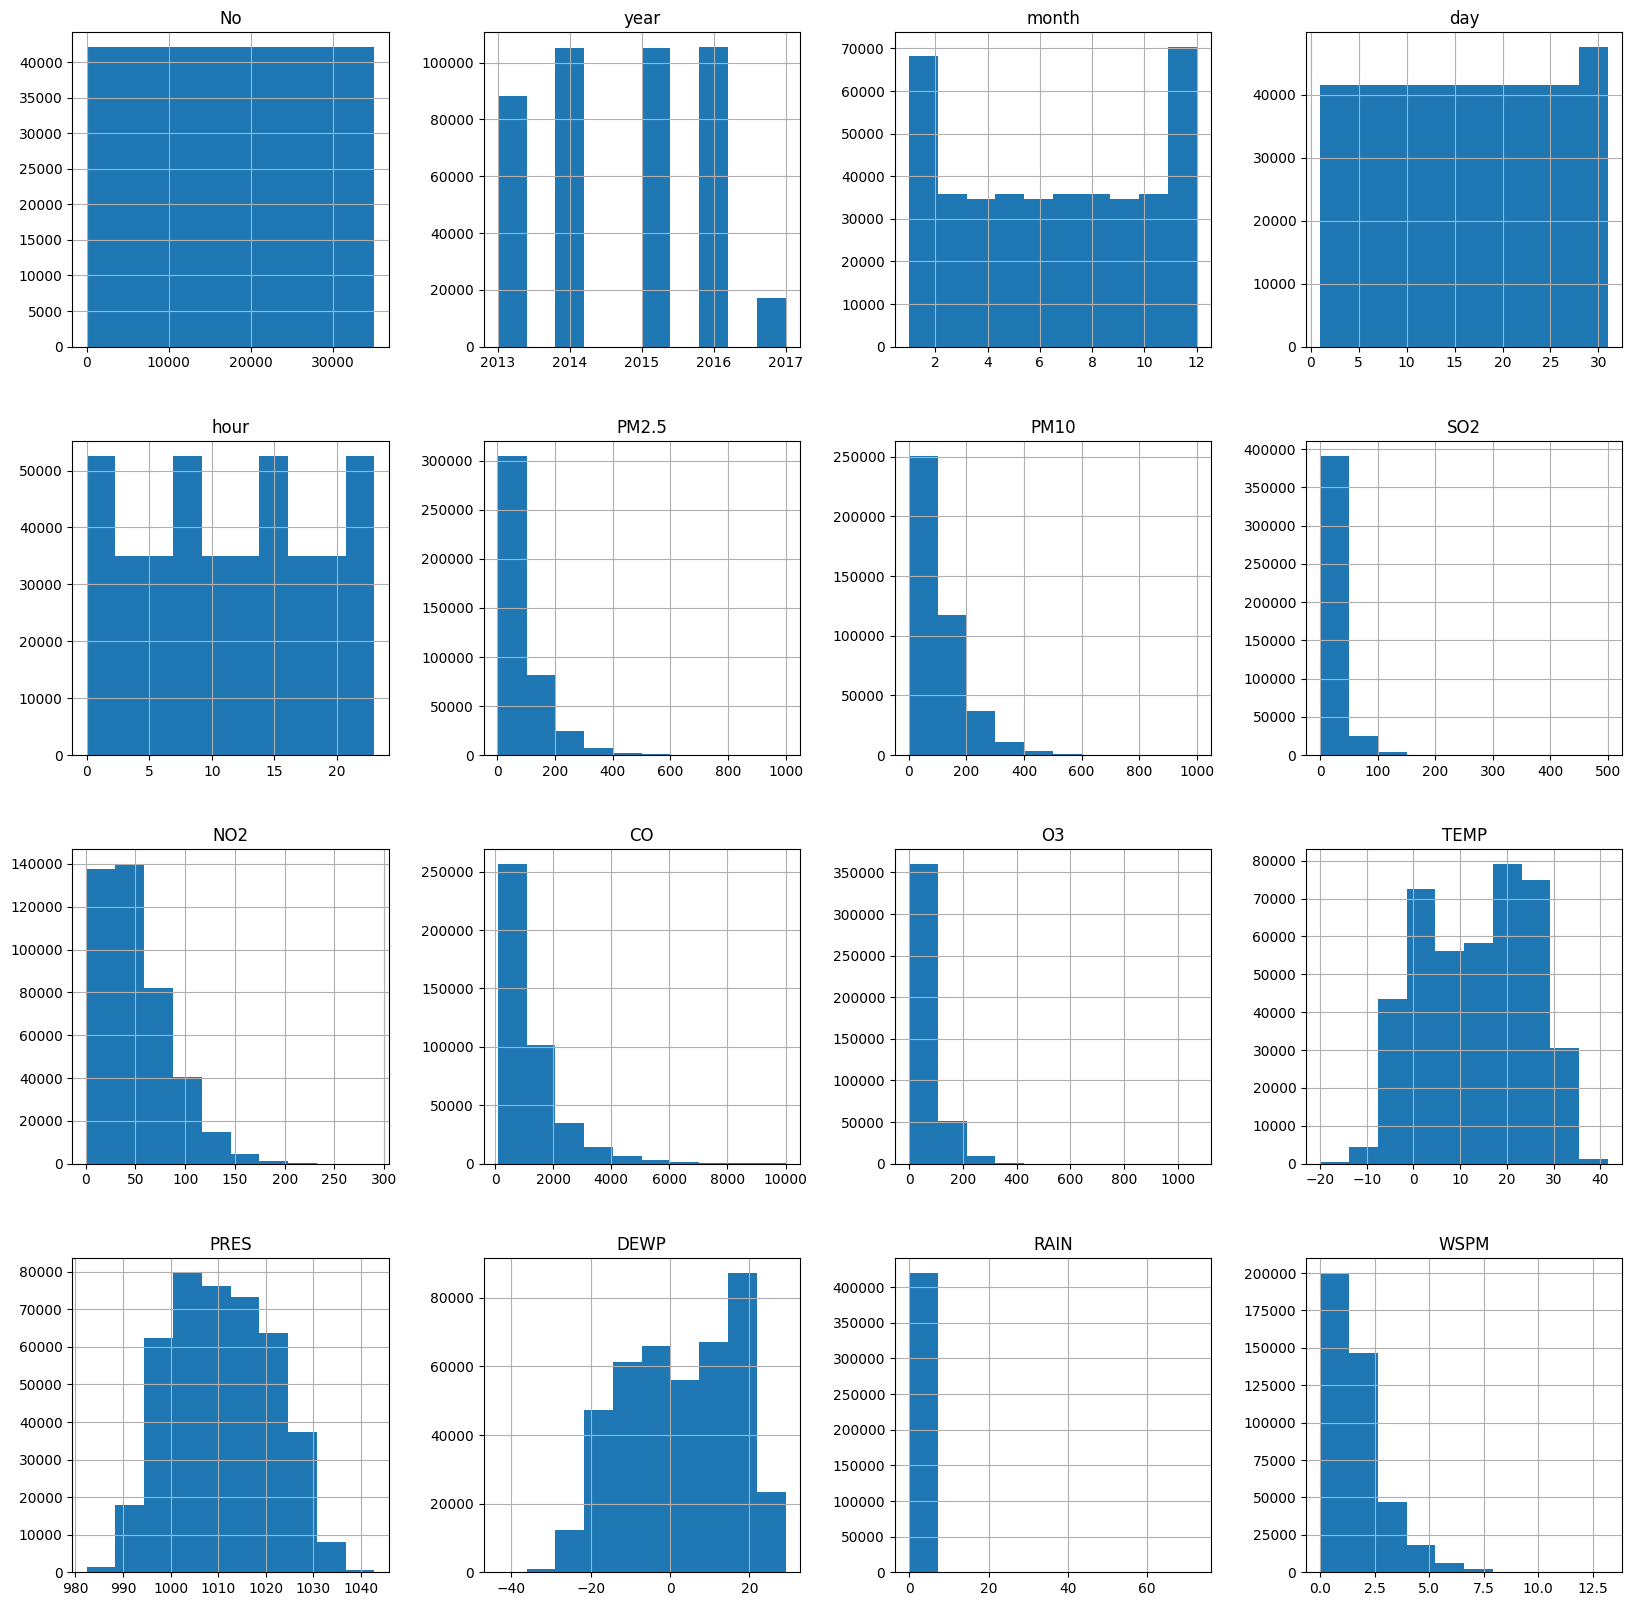

In [15]:
# Melihat distribusi data
data.hist(figsize=(20,20))
plt.show()

**Insight:**
- Konsentrasi polutan udara seperti PM2.5, PM10, SO2, NO2, CO, dan O3 sebagian besar terkonsentrasi pada tingkat yang lebih rendah, dengan frekuensi data menurun drastis seiring peningkatan konsentrasi. Ini mengindikasikan bahwa meskipun ada kejadian polusi yang lebih tinggi, mayoritas waktu kualitas udara berada pada tingkat yang relatif lebih baik atau sedang. Namun, ekor panjang (data dengan konsentrasi tinggi namun frekuensi rendah) pada distribusi beberapa polutan (terutama PM2.5 dan PM10) menunjukkan adanya kejadian polusi yang signifikan dan perlu diperhatikan.

In [16]:
# Mengambil data column numeric
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns = numeric_columns[5:]

# Melihat rata-rata data tiap stasiun
data.groupby('station')[numeric_columns].mean()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,
Aotizhongxin,82.040934,109.485803,17.334701,59.052964,1244.561887,55.796764,13.584581,1011.846292,3.122702,0.067383,1.708505
Changping,70.744359,94.447773,14.974522,44.304903,1141.357061,57.717103,13.685889,1007.764537,1.506985,0.060278,1.853684
Dingling,65.745349,83.707175,11.834616,28.396770,904.615132,67.733070,13.685889,1007.764537,1.506985,0.060278,1.853684
Dongsi,85.527068,109.889839,18.480049,53.559686,1290.857090,56.979406,13.671414,1012.546392,2.447559,0.063983,1.860732
Guanyuan,82.442642,108.692679,17.567148,57.765139,1252.731776,55.433916,13.584581,1011.846292,3.122702,0.067383,1.708505
Gucheng,83.320534,118.461442,15.372880,55.771391,1307.034309,57.430945,13.864051,1008.832326,2.610268,0.064374,1.343773
Huairou,69.228839,91.272559,12.225223,33.345232,1017.584417,59.338082,12.447016,1007.603327,2.239001,0.067833,1.652129
Nongzhanguan,84.304073,108.652398,18.652884,57.949975,1309.754991,58.339367,13.671414,1012.546392,2.447559,0.063983,1.860732
Shunyi,78.853887,98.475451,13.655526,44.170845,1169.233003,54.768120,13.388189,1013.058571,2.465075,0.061006,1.807435


**Insight:**
- Stasiun "Wanshouxigong" dan "Gucheng" menunjukkan nilai rata-rata PM10 dan CO yang cenderung lebih tinggi dibandingkan stasiun lainnya. Wanshouxigong memiliki PM10 rata-rata tertinggi (111.806274) dan Gucheng memiliki CO rata-rata tertinggi (1307.034309). Ini mungkin mengindikasikan bahwa kedua stasiun ini berlokasi di area dengan tingkat polusi partikulat dan karbon monoksida yang lebih tinggi secara konsisten, yang bisa disebabkan oleh faktor geografis, kepadatan lalu lintas, atau aktivitas industri di sekitarnya.

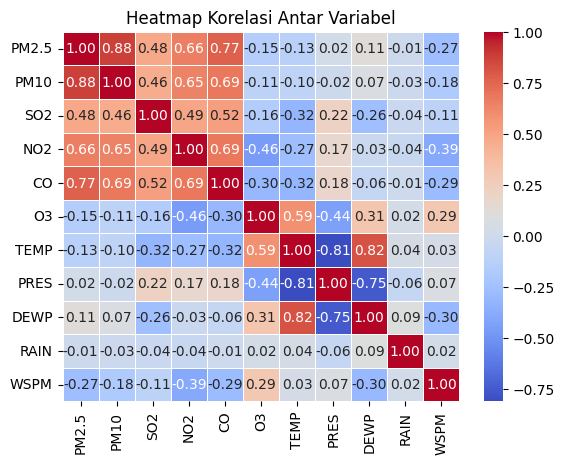

In [17]:
# Melihat korelasi antar variable
# plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

**Insight:**
- Terdapat korelasi positif yang kuat antara sebagian besar polutan udara (PM2.5, PM10, SO2, NO2, dan CO). Secara khusus, PM2.5 menunjukkan korelasi positif yang sangat kuat dengan PM10 (0.88) dan CO (0.77), serta korelasi kuat dengan SO2 (0.48) dan NO2 (0.66). Ini mengindikasikan bahwa peningkatan satu jenis polutan seringkali diikuti oleh peningkatan polutan lain, menunjukkan sumber emisi yang serupa atau kondisi atmosfer yang mendukung akumulasi beberapa polutan secara bersamaan. Fenomena ini sangat relevan untuk strategi pengendalian polusi, karena tindakan untuk mengurangi satu polutan kemungkinan besar akan memiliki efek positif pada polutan lainnya.

## Visualization & Explanatory Analysis

Visualisasi data bertujuan untuk membantu memahami struktur, pola, dan sebaran data secara lebih intuitif dibandingkan hanya mengandalkan angka-angka. Dengan visualisasi, informasi dalam data dapat disampaikan dengan cara yang lebih jelas dan mudah dipahami oleh stakeholder.

### Pertanyaan 1:
Bagaimana tren kualitas udara dari tahun ke tahun di berbagai lokasi di Beijing?

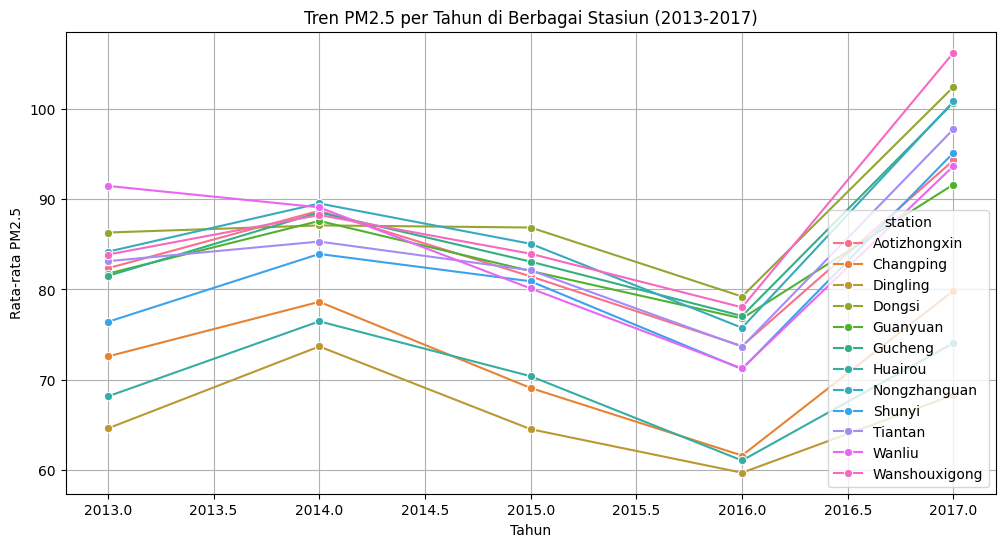

In [20]:
# Mengubah kolom waktu menjadi format datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Menambahkan kolom tahunan jika belum ada
data['year'] = data['date'].dt.year

# Menghitung nilai rata-rata polusi per tahun untuk tiap stasiun
yearly_trend = data.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO', 'O3', 'SO2', 'NO2']].mean().reset_index()

# Visualisasi tren PM2.5 dari tahun ke tahun
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='year', y='PM2.5', hue='station', marker='o')
plt.title('Tren PM2.5 per Tahun di Berbagai Stasiun (2013-2017)')
plt.ylabel('Rata-rata PM2.5')
plt.xlabel('Tahun')
plt.grid(True)
plt.show()

**Insight:**
- Tren rata-rata PM2.5 di sebagian besar stasiun di Beijing menunjukkan penurunan signifikan dari puncaknya di sekitar tahun 2014 atau 2015 menuju tahun 2016. Hampir semua stasiun mencapai titik terendah konsentrasi PM2.5 rata-rata pada tahun 2016. Namun, setelah tahun 2016, terlihat adanya kenaikan kembali konsentrasi PM2.5 di sebagian besar stasiun pada tahun 2017, meskipun umumnya masih di bawah level puncak tahun 2014-2015.
- Berdasarkan data ini, dapat disimpulkan bahwa upaya pengurangan polusi udara menunjukkan keberhasilan yang nyata pada tahun 2016, ditandai dengan penurunan konsentrasi PM2.5 yang drastis di seluruh stasiun. Penurunan ini mungkin merupakan hasil dari kebijakan dan inisiatif yang diterapkan pemerintah.
- Namun, kenaikan kembali pada tahun 2017 mengindikasikan bahwa keberhasilan tersebut mungkin tidak sepenuhnya berkelanjutan atau bahwa faktor-faktor lain mulai kembali memengaruhi kualitas udara. Hal ini menyiratkan bahwa upaya berkelanjutan dan peninjauan kebijakan mungkin diperlukan untuk memastikan tren penurunan polusi yang konsisten di masa mendatang.

### Pertanyaan 2:
Stasiun mana yang mencatat tingkat polusi tertinggi dan terendah secara konsisten?

5 Stasiun dengan Polusi Tertinggi (PM2.5):
station
Dongsi           85.527068
Wanshouxigong    84.428174
Nongzhanguan     84.304073
Gucheng          83.320534
Wanliu           83.065591
Name: PM2.5, dtype: float64

5 Stasiun dengan Polusi Terendah (PM2.5):
station
Tiantan      81.640423
Shunyi       78.853887
Changping    70.744359
Huairou      69.228839
Dingling     65.745349
Name: PM2.5, dtype: float64


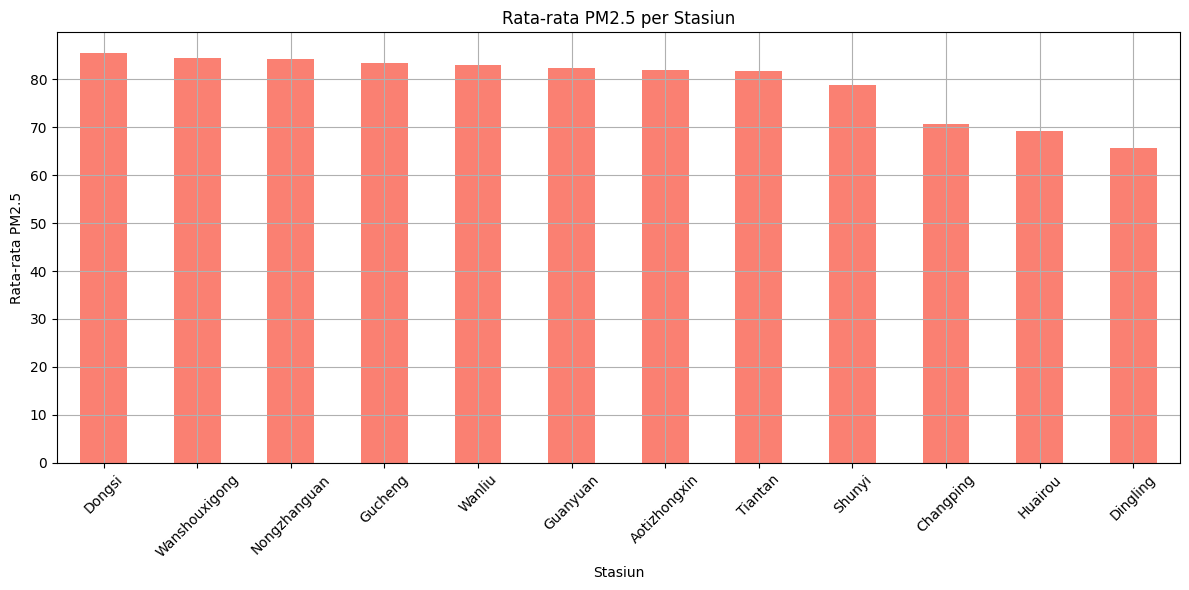

In [21]:
# Rata-rata PM2.5 per stasiun sepanjang periode data
station_mean_pm25 = data.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

# Menampilkan 5 stasiun terburuk dan terbaik berdasarkan PM2.5
print("5 Stasiun dengan Polusi Tertinggi (PM2.5):")
print(station_mean_pm25.head(5))

print("\n5 Stasiun dengan Polusi Terendah (PM2.5):")
print(station_mean_pm25.tail(5))

# Visualisasi
station_mean_pm25.plot(kind='bar', figsize=(12, 6), color='salmon')
plt.title('Rata-rata PM2.5 per Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.xlabel('Stasiun')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Stasiun Dongsi mencatat rata-rata PM2.5 tertinggi (85.527868), menjadikannya area dengan tingkat polusi tertinggi secara keseluruhan dalam dataset ini. Sebaliknya, stasiun Dingling secara konsisten menunjukkan rata-rata PM2.5 terendah (65.745349).
- Berdasarkan rata-rata PM2.5, Dongsi dan stasiun-stasiun yang berdekatan di daftar teratas (Wanshouxigong, Nongzhanguan, Gucheng, Wanliu) adalah area yang paling berisiko tinggi terhadap polusi udara. Area-area ini secara konsisten terpapar tingkat PM2.5 yang lebih tinggi dan karenanya membutuhkan intervensi yang lebih prioritas dan fokus untuk mengurangi dampak kesehatan dan lingkungan. Intervensi dapat mencakup penegakan regulasi emisi yang lebih ketat, peningkatan transportasi publik, pengembangan infrastruktur hijau, atau program kesadaran publik yang ditargetkan di lokasi-lokasi tersebut.

### Pertanyaan 3:
Apakah ada perbedaan kualitas udara antara musim (musim dingin vs musim panas)?

Rata-rata polusi per musim (Winter vs Summer):
            PM2.5        PM10           CO        SO2        NO2
season                                                          
Summer  64.463736   80.890526   900.303036   6.237347  37.376246
Winter  94.681107  113.555134  1759.620268  28.252694  59.586243


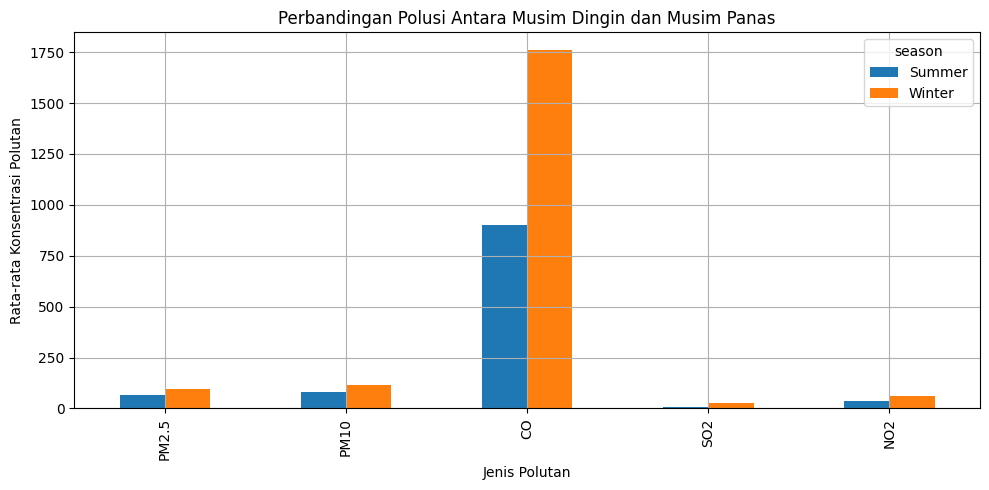

In [22]:
# Menentukan musim berdasarkan bulan
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Other'

data['season'] = data['month'].apply(assign_season)

# Filter hanya musim panas dan dingin
seasonal_data = data[data['season'].isin(['Winter', 'Summer'])]

# Rata-rata polusi per musim
seasonal_mean = seasonal_data.groupby('season')[['PM2.5', 'PM10', 'CO', 'SO2', 'NO2']].mean()

print("Rata-rata polusi per musim (Winter vs Summer):")
print(seasonal_mean)

# Visualisasi
seasonal_mean.T.plot(kind='bar', figsize=(10, 5))
plt.title('Perbandingan Polusi Antara Musim Dingin dan Musim Panas')
plt.ylabel('Rata-rata Konsentrasi Polutan')
plt.xlabel('Jenis Polutan')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Secara umum, tingkat polusi udara jauh lebih tinggi di musim dingin (Winter) dibandingkan dengan musim panas (Summer) untuk semua jenis polutan yang diukur (PM2.5, PM10, CO, SO2, dan NO2). Perbedaan paling mencolok terlihat pada konsentrasi CO, di mana rata-rata di musim dingin (1759.620268) hampir dua kali lipat dari musim panas (900.303036). Polutan lainnya juga menunjukkan peningkatan yang signifikan di musim dingin, meskipun dengan rasio yang bervariasi.
- Faktor musiman memiliki pengaruh yang sangat kuat dan dominan terhadap tingkat polusi di Beijing. Musim dingin jelas merupakan periode di mana polusi udara menjadi lebih parah. Hal ini kemungkinan besar disebabkan oleh beberapa faktor, seperti:
  - Pemanasan Musim Dingin: Penggunaan bahan bakar fosil (seperti batu bara) untuk pemanas ruangan meningkat drastis di musim dingin, menyebabkan emisi polutan yang lebih tinggi.
  - Kondisi Meteorologi: Pola cuaca di musim dingin (misalnya, inversi termal, angin yang lebih tenang, dan suhu rendah) dapat memerangkap polutan di dekat permukaan tanah, mencegah dispersi dan akumulasi polutan.

## Analisis Lanjutan (Clustering)
Mengelompokkan hari-hari berdasarkan tingkat polusi untuk melihat distribusi hari bersih, sedang, dan tercemar parah

Mengacu pada standar kualitas udara (misalnya WHO atau lokal), kita kelompokan hari-hari ke dalam:

Baik: PM2.5 ≤ 35

Sedang: 35 < PM2.5 ≤ 75

Buruk: PM2.5 > 75

In [23]:
def categorize_pm25(pm):
    if pm <= 35:
        return 'Baik'
    elif pm <= 75:
        return 'Sedang'
    else:
        return 'Buruk'

data['PM25_Category'] = data['PM2.5'].apply(categorize_pm25)

Membuat bin suhu untuk mengelompokkan suhu ke dalam kategori:

Dingin: TEMP ≤ 0

Sedang: 0 < TEMP ≤ 20

Panas: TEMP > 20

In [24]:
bins = [-float('inf'), 0, 20, float('inf')]
labels = ['Dingin', 'Sedang', 'Panas']
data['TEMP_Category'] = pd.cut(data['TEMP'], bins=bins, labels=labels)

In [25]:
# Melihat distribusi kategori
print(data['PM25_Category'].value_counts())
print(data['TEMP_Category'].value_counts())

PM25_Category
Buruk     161002
Baik      153871
Sedang    105895
Name: count, dtype: int64
TEMP_Category
Sedang    203873
Panas     149907
Dingin     66988
Name: count, dtype: int64


In [26]:
# Melihat hubungan suhu dan polusi
pd.crosstab(data['TEMP_Category'], data['PM25_Category'])

PM25_Category,Baik,Buruk,Sedang
TEMP_Category,,,
Dingin,26501,29430,11057
Sedang,76640,77967,49266
Panas,50730,53605,45572


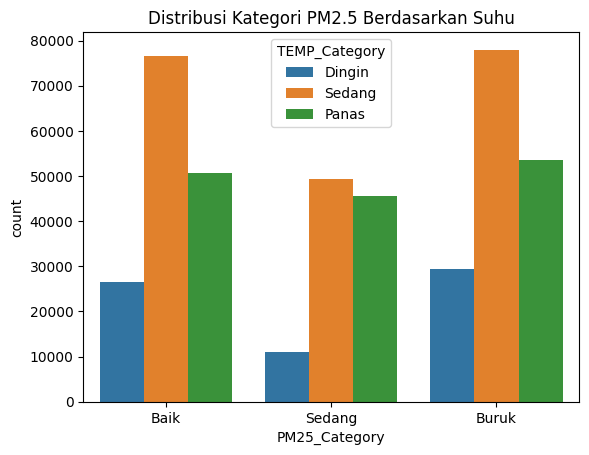

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='PM25_Category', hue='TEMP_Category')
plt.title('Distribusi Kategori PM2.5 Berdasarkan Suhu')
plt.show()

**Insight:**
- Kategori suhu Sedang mendominasi jumlah hari dengan PM2.5 kategori Buruk. Ini menunjukkan bahwa hari dengan suhu antara 0°C hingga 20°C cenderung mengalami kualitas udara yang buruk.
- Meskipun jumlah hari dalam kategori suhu Dingin tidak sebanyak yang lain, namun terlihat bahwa proporsi polusi Buruk pada suhu dingin cukup tinggi dibanding jumlah harinya. Ini mengindikasikan bahwa musim dingin (biasanya suhu < 0°C) juga berisiko tinggi terhadap polusi, kemungkinan karena pembakaran batu bara atau pemanas rumah.
- Meskipun Panas identik dengan cuaca cerah, banyak juga hari dengan suhu panas yang masuk dalam kategori polusi Buruk. Artinya, suhu tinggi bukan jaminan udara bersih, faktor lain seperti emisi kendaraan atau kondisi atmosfer juga berpengaruh.
- Kategori suhu Sedang memiliki jumlah hari terbanyak baik untuk PM2.5 kategori Baik maupun Buruk, menunjukkan fluktuasi besar dalam kualitas udara saat suhu moderat.

## Conclusion

- Upaya pengurangan polusi udara di Beijing menunjukkan keberhasilan nyata pada tahun 2016 dengan penurunan drastis PM2.5, namun tren ini berbalik pada tahun 2017 dengan kenaikan kembali polusi. Ini menandakan perlunya upaya berkelanjutan dan evaluasi kebijakan untuk mencapai perbaikan kualitas udara yang konsisten.
- Analisis rata-rata PM2.5 menunjukkan bahwa Stasiun Dongsi merupakan area dengan tingkat polusi udara tertinggi, menjadikannya prioritas utama untuk intervensi. Sebaliknya, Stasiun Dingling mencatat tingkat polusi terendah. Data ini sangat penting untuk mengidentifikasi dan menargetkan area-area berisiko tinggi (seperti Dongsi dan sekitarnya) yang membutuhkan kebijakan dan program mitigasi polusi yang lebih fokus dan segera guna melindungi kesehatan masyarakat dan lingkungan.
- Faktor musiman memiliki pengaruh yang sangat signifikan dan dominan terhadap kualitas udara di Beijing. Musim dingin secara konsisten mencatat tingkat polusi yang jauh lebih tinggi untuk semua jenis polutan dibandingkan dengan musim panas, terutama untuk CO. Hal ini kemungkinan besar disebabkan oleh peningkatan emisi dari pemanasan di musim dingin dan kondisi meteorologi yang tidak mendukung dispersi polutan. Oleh karena itu, strategi mitigasi polusi di Beijing harus secara khusus menargetkan dan mempertimbangkan faktor-faktor pendorong polusi selama musim dingin untuk mencapai efektivitas yang maksimal.